<a href="https://colab.research.google.com/github/basmaeldrandaly/EC-algorithms/blob/main/GA_and_DE_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GA:
**2** Generation , **0.74095 s**
-------------------
# DE:
## **98** Generations, **0.19285 s**

# GA 


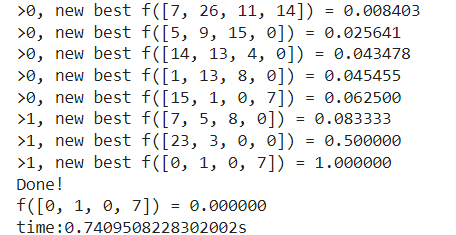

In [1]:
from numpy.random import randint
from numpy.random import rand
import numpy.random as npr
import time
 
# objective function
def objective(x):
	return x[0]+ x[1]*2.0+x[2]*3+x[3]*4-30

In [2]:
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extract the substring
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convert bitstring to a string of chars
		chars = ''.join([str(s) for s in substring])
		# convert string to integer
		integer = int(chars, 2)
		# scale integer to desired range
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		# store
		decoded.append(int(value))
	return decoded

In [3]:
# roulette selection
def selection(pop, fitnesses):
  total=sum(fitnesses)
  probabilities=[fitnesses[c]/total for c in range(len(pop))]

  return pop[npr.choice(n_pop, p=probabilities)]
	

In [4]:
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

In [5]:
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

In [6]:
# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, 1/(1+abs(objective(decode(bounds, n_bits, pop[0]))))
	# enumerate generations
	for gen in range(n_iter):
		# decode population
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluate all candidates in the population
		scores = [1/(1+abs(objective(d))) for d in decoded]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] > best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval]

In [7]:
# define range for input
bounds = [[0, 30],[0, 30],[0, 30],[0, 30]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 5
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))
# perform the genetic algorithm search
start=time.time()
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, objective(decoded)))
end=time.time()
print(f"time:{end-start}s")

>0, new best f([7, 26, 11, 14]) = 0.008403
>0, new best f([5, 9, 15, 0]) = 0.025641
>0, new best f([14, 13, 4, 0]) = 0.043478
>0, new best f([1, 13, 8, 0]) = 0.045455
>0, new best f([15, 1, 0, 7]) = 0.062500
>1, new best f([7, 5, 8, 0]) = 0.083333
>1, new best f([23, 3, 0, 0]) = 0.500000
>1, new best f([0, 1, 0, 7]) = 1.000000
Done!
f([0, 1, 0, 7]) = 0.000000
time:0.7409508228302002s


In [8]:
5+10+3+12-30

0

In [9]:
objective(decoded)

0.0

# DE

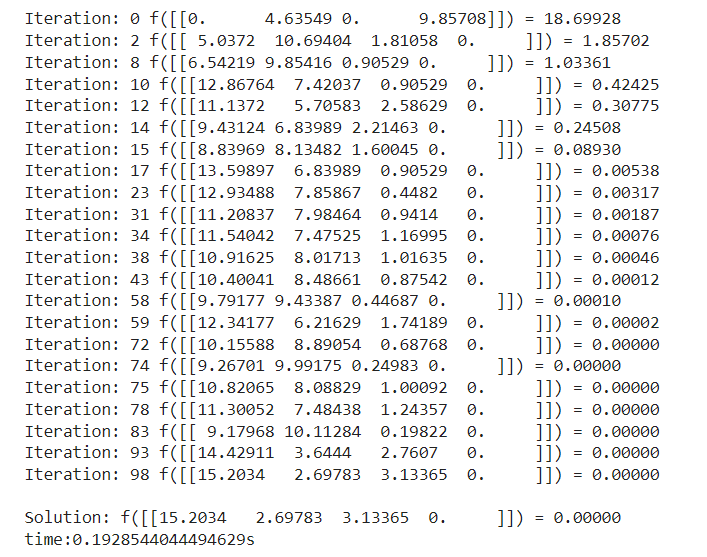

In [10]:
# differential evolution search of the x^3+3x objective function
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
import time


# define objective function
def obj(x):
	return x[0]+ x[1]*2.0+x[2]*3+x[3]*4-30


# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])


# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound


# define crossover operation
def crossover(mutated, target, dims, cr):
    # generate a uniform random value for every dimension
    p = rand(dims)
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial


def differential_evolution(pop_size, bounds, iter, F, cr):
    # initialise population of candidate solutions randomly within the specified bounds
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    # evaluate initial population of candidate solutions
    obj_all = [abs(obj(ind)) for ind in pop]
    # find the best performing vector of initial population
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    # run iterations of the algorithm
    for i in range(iter):
        # iterate over all candidate solutions
        for j in range(pop_size):
            # choose three candidates, a, b and c, that are not the current one
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            # perform mutation
            mutated = mutation([a, b, c], F)
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr)
            # compute objective function value for target vector
            obj_target = abs(obj(pop[j]))
            # compute objective function value for trial vector
            obj_trial = abs(obj(trial))
            # perform selection
            if obj_trial < obj_target:
                # replace the target vector with the trial vector
                pop[j] = trial
                # store the new objective function value
                obj_all[j] = obj_trial
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            # report progress at each iteration
            print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj]


# define population size
pop_size = 10
# define lower and upper bounds for every dimension
bounds = asarray([(0, 30),(0, 30),(0, 30),(0, 30)])
# define number of iterations
iter = 100
# define scale factor for mutation
F = 0.5
# define crossover rate for recombination
cr = 0.7

start=time.time()
# perform differential evolution
solution = differential_evolution(pop_size, bounds, iter, F, cr)
print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))
end=time.time()
print(f"time:{end-start}s")

Iteration: 0 f([[0.      4.63549 0.      9.85708]]) = 18.69928
Iteration: 2 f([[ 5.0372  10.69404  1.81058  0.     ]]) = 1.85702
Iteration: 8 f([[6.54219 9.85416 0.90529 0.     ]]) = 1.03361
Iteration: 10 f([[12.86764  7.42037  0.90529  0.     ]]) = 0.42425
Iteration: 12 f([[11.1372   5.70583  2.58629  0.     ]]) = 0.30775
Iteration: 14 f([[9.43124 6.83989 2.21463 0.     ]]) = 0.24508
Iteration: 15 f([[8.83969 8.13482 1.60045 0.     ]]) = 0.08930
Iteration: 17 f([[13.59897  6.83989  0.90529  0.     ]]) = 0.00538
Iteration: 23 f([[12.93488  7.85867  0.4482   0.     ]]) = 0.00317
Iteration: 31 f([[11.20837  7.98464  0.9414   0.     ]]) = 0.00187
Iteration: 34 f([[11.54042  7.47525  1.16995  0.     ]]) = 0.00076
Iteration: 38 f([[10.91625  8.01713  1.01635  0.     ]]) = 0.00046
Iteration: 43 f([[10.40041  8.48661  0.87542  0.     ]]) = 0.00012
Iteration: 58 f([[9.79177 9.43387 0.44687 0.     ]]) = 0.00010
Iteration: 59 f([[12.34177  6.21629  1.74189  0.     ]]) = 0.00002
Iteration: 72 f([